In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessing

Xtrain=preprocessing.kag_X_train
Xtest=preprocessing.kag_X_test
ytrain=preprocessing.kag_y_train
ytest=preprocessing.kag_y_test

class1=Xtrain[ytrain==1]
class2=Xtrain[ytrain==0]

ytrain


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
data=pd.read_excel('cancer2.xlsx')
ax=data.plot.scatter(x='x1',y='x2',c='Label',colormap='viridis')
# ax.grid(which='both')
# ax.minorticks_on()

FileNotFoundError: [Errno 2] No such file or directory: 'cancer2.xlsx'

In [ ]:
c0=data.where(data['Label']==0).dropna()
c0=-c0.values
c0.T[0]= -np.ones(c0.shape[0])
samples=np.concatenate((c0, data.where(data['Label']==1).dropna().values),axis=0)


In [ ]:

A=np.ones(samples.shape[1])
k=0.001
counter=1
misVscount=[]
weightVscount=[]
prev_mcount=0
while counter!=-1:
    mcount=0
    
    misclassed=np.zeros(len(A))
    for sample in samples:
        # if misclassified
        if A.dot(sample)<=0:
            misclassed+=sample
            mcount+=1

    if (misclassed == np.zeros(len(misclassed))).all():
        counter+=1
        misVscount.append([counter,mcount])
        weightVscount.append([A,mcount])

        break
    elif counter==10000:
        break
    else:
        weightVscount.append([A,mcount])
        # new weight
        A=A+ k*misclassed
        counter+=1
        if prev_mcount==mcount:
            k*=.9
        prev_mcount=mcount
        misVscount.append([counter,mcount])
mcount
# k


7

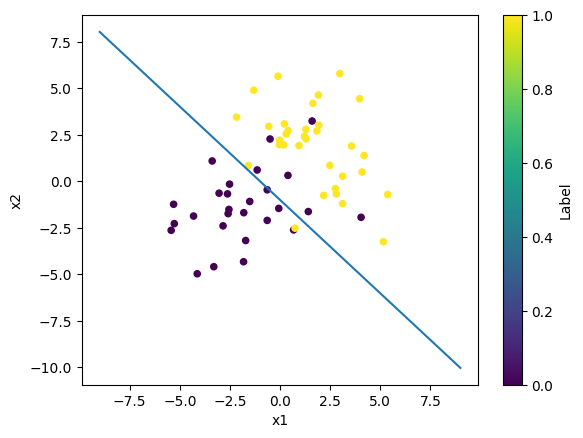

In [ ]:
x=np.linspace(-9, 9, 1000)
ax=data.plot.scatter(x='x1',y='x2',c='Label',colormap='viridis')
plt.plot(x,-(A[1]*x+A[0])/A[2])


In [ ]:
class0=data.where(data['Label']==0).dropna()[['x1','x2']].values
class1=data.where(data['Label']==1).dropna()[['x1','x2']].values
m0=np.array([class0.T[0].mean(),class0.T[1].mean()])
m1=np.array([class1.T[0].mean(),class1.T[1].mean()])
m=np.array([data[['x1','x2']].values.T[0].mean(),data[['x1','x2']].values.T[1].mean()])
s0=(class0-m0).T.dot(class0-m0)
s1=(class1-m1).T.dot(class1-m1)
s=s0+s1
w=np.linalg.inv(s).dot(m1-m0)
w0=-m.T.dot(w)
A=np.concatenate(([w0],w))
A

array([-0.00705453,  0.01514115,  0.01448338])

In [ ]:
test=((data[['x1','x2']].values.dot(A[1:])+A[0]<0))==((data[['Label']].values.flatten()==0))
misclassed=data.shape[0]-test.sum()
error=misclassed/data.shape[0]
error

0.1